Dataset Shape: (768, 9)

Dataset Columns:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.

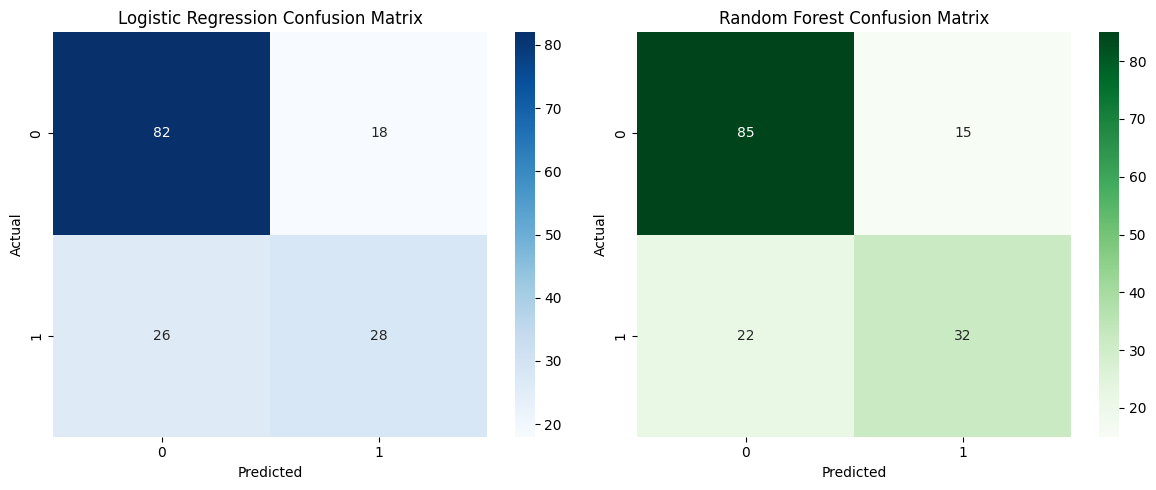


--- Logistic Regression Coefficients (Risk Impact) ---
                    Feature  Coefficient
1                   Glucose     1.158385
5                       BMI     0.715863
0               Pregnancies     0.379105
6  DiabetesPedigreeFunction     0.256321
7                       Age     0.183266
3             SkinThickness     0.066689
4                   Insulin    -0.135689
2             BloodPressure    -0.207532

--- Random Forest Feature Importance (Top Risk Factors) ---
                    Feature  Importance
1                   Glucose    0.276009
5                       BMI    0.159544
7                       Age    0.127248
6  DiabetesPedigreeFunction    0.126731
2             BloodPressure    0.085606
0               Pregnancies    0.084456
4                   Insulin    0.072409
3             SkinThickness    0.067997


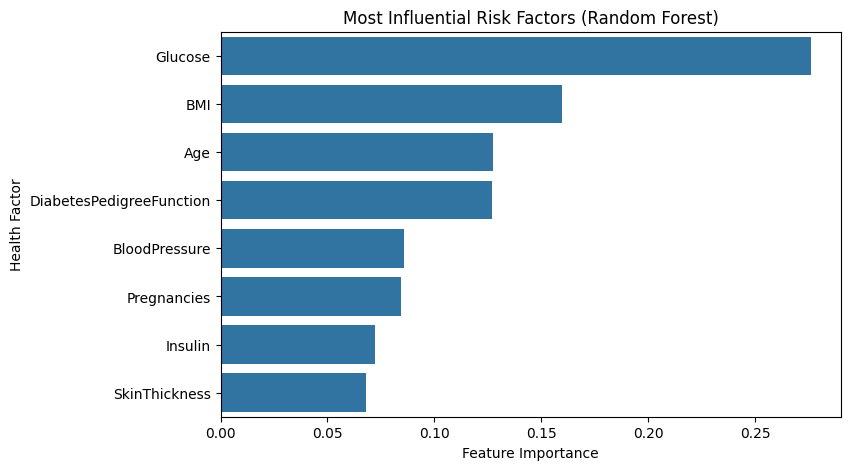


Key Interpretation:
--------------------
1. Logistic Regression coefficients show how each variable influences disease risk.
   - Positive coefficient: increases disease likelihood.
   - Negative coefficient: reduces disease likelihood.

2. Random Forest feature importance ranks features by predictive power.
   - Higher importance = stronger impact on disease prediction.

Common risk factors (for diabetes) often include:
   - Glucose level
   - BMI
   - Age
   - Insulin
   - BloodPressure


✅ Experiment Completed. Results saved as CSV files.


In [1]:
# ============================================================
# Experiment 7: Risk Factor Analysis Using Machine Learning
# ============================================================

# 1.1 Aim:
# Perform risk factor analysis using machine learning algorithms.

# 1.2 Lab Outcome:
# Apply knowledge of healthcare datasets to identify and interpret key disease risk factors.

# 1.3 Learning Outcome:
# Analyze patient data and determine major factors influencing disease development.

# ============================================================
# Step 1: Import Required Libraries
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ============================================================
# Step 2: Load Dataset
# ============================================================

# Dataset Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df = pd.read_csv("diabetes.csv")

# Display basic info
print("Dataset Shape:", df.shape)
df.head()

# ============================================================
# Step 3: Data Understanding
# ============================================================

print("\nDataset Columns:")
print(df.columns.tolist())

print("\nMissing Values:\n", df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

# ============================================================
# Step 4: Data Preprocessing
# ============================================================

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ============================================================
# Step 5: Logistic Regression Model
# ============================================================

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
print("\n--- Logistic Regression Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# ============================================================
# Step 6: Random Forest Model
# ============================================================

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ============================================================
# Step 7: Confusion Matrix Visualization
# ============================================================

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# ============================================================
# Step 8: Feature Importance Analysis (Risk Factors)
# ============================================================

# Logistic Regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Random Forest feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Logistic Regression Coefficients (Risk Impact) ---")
print(coefficients)

print("\n--- Random Forest Feature Importance (Top Risk Factors) ---")
print(importance)

# Plot Random Forest Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Most Influential Risk Factors (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Health Factor")
plt.show()

# ============================================================
# Step 9: Interpretation
# ============================================================

print("""
Key Interpretation:
--------------------
1. Logistic Regression coefficients show how each variable influences disease risk.
   - Positive coefficient: increases disease likelihood.
   - Negative coefficient: reduces disease likelihood.

2. Random Forest feature importance ranks features by predictive power.
   - Higher importance = stronger impact on disease prediction.

Common risk factors (for diabetes) often include:
   - Glucose level
   - BMI
   - Age
   - Insulin
   - BloodPressure
""")

# ============================================================
# Step 10: Save Results
# ============================================================

coefficients.to_csv("logistic_regression_risk_factors.csv", index=False)
importance.to_csv("random_forest_risk_factors.csv", index=False)

print("\n✅ Experiment Completed. Results saved as CSV files.")
